In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

In [2]:
# Load data
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [3]:
# 7000 data with 300 features
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(7000, 300)
(7000,)
(3000, 300)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


# Q1

In [5]:
def cross_validation(x_train, y_train, k=5):
    
    # Do not modify the function name and always take 'x_train, y_train, k' as the inputs.

    # TODO HERE
    n_samples = x_train.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    folds = []
    '''
    let n_samples = 70, K = 8
    then first 70 % 8 = 6 folds, each has 70 // 8 + 1 = 9 samples
    other 8-6 folds, each has 70 // 8 = 8 samples
    total = 6 * 9 + 2 * 8 = 70 samples == n_samples
    '''
    size = n_samples//k + 1
    for i in range(n_samples%k):
        start = i * size
        fold = indices[start:start+size]
        folds.append(fold)

    size = n_samples // k
    for i in range(n_samples%k, k):
        start = i * size
        fold = indices[start:start+size]
        folds.append(fold)
    folds = np.asarray(folds)

    kfold = []
    for i in range(k):
        train = folds[np.arange(k)!=i]
        val = folds[i]
        kfold.append([train.ravel(), val])
    return kfold
    #return NotImplementedError

In [6]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

# K-Fold Example

In [7]:
from sklearn.model_selection import KFold

X = np.arange(20)

kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  3  5  6  7  8  9 10 14 15 16 17 18 19], Validation index: [ 4 11 12 13]
Split: 2, Training index: [ 0  1  2  4  5  6  8 10 11 12 13 14 15 16 17 18], Validation index: [ 3  7  9 19]
Split: 3, Training index: [ 0  2  3  4  5  6  7  9 11 12 13 14 15 16 17 19], Validation index: [ 1  8 10 18]
Split: 4, Training index: [ 1  2  3  4  6  7  8  9 10 11 12 13 14 16 18 19], Validation index: [ 0  5 15 17]
Split: 5, Training index: [ 0  1  3  4  5  7  8  9 10 11 12 13 15 17 18 19], Validation index: [ 2  6 14 16]


In [8]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Q2

In [9]:
# (Example) Using SVC from sklearn

clf = SVC(C=1.0, gamma=0.01, kernel='rbf')

In [10]:
best_c, best_gamma = None, None

# TODO HERE
# k-Flod Cross Validation and Grid Search
C = [0.01, 0.1, 1, 10, 100]
gamma = [0.0001, 0.001, 0.01, 1, 10, 100]
max_acc = 0
grid = []
kfold_data = cross_validation(x_train, y_train, 5)
print(len(kfold_data[0][1]))
for c in C:
    for g in gamma:
        acc = 0
        classifier = SVC(C = c, gamma = g, kernel = 'rbf')
        for kf in kfold_data:
            xt = x_train[kf[0]]
            yt = y_train[kf[0]]
            xv = x_train[kf[1]]
            yv = y_train[kf[1]]

            
            classifier.fit(xt, yt)
            y_pred = classifier.predict(xv)
            acc += accuracy_score(yv, y_pred)
        acc /= len(kfold_data)

        if acc > max_acc:
            best_c = c
            best_gamma = g
            max_acc = acc
        
        grid.append(acc)
grid_array = np.array(grid).reshape((len(C), len(gamma)))
best_parameters=(best_c, best_gamma)

1400


In [11]:
print("(best_c, best_gamma) is ", best_parameters)
print(grid_array)

(best_c, best_gamma) is  (1, 0.0001)
[[0.48814286 0.48814286 0.48814286 0.48814286 0.48814286 0.48814286]
 [0.97957143 0.48814286 0.48814286 0.48814286 0.48814286 0.48814286]
 [0.99485714 0.48814286 0.48814286 0.48814286 0.48814286 0.48814286]
 [0.99485714 0.48814286 0.48814286 0.48814286 0.48814286 0.48814286]
 [0.99485714 0.48814286 0.48814286 0.48814286 0.48814286 0.48814286]]


# Q3

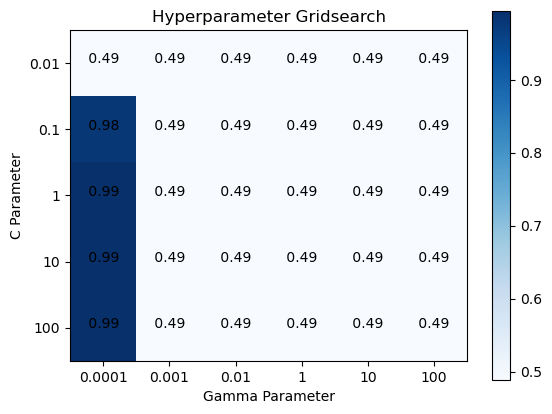

In [12]:
# Plot the grid search results of your SVM

# TODO HERE
plt.imshow(grid_array, cmap = 'Blues')
plt.colorbar()
plt.title("Hyperparameter Gridsearch")
plt.xlabel("Gamma Parameter")
plt.xticks(np.arange(len(gamma)), gamma)
plt.ylabel("C Parameter")
plt.yticks(np.arange(len(C)), C)
for x in range(len(C)):
    for y in range(len(gamma)):
        plt.text(y-0.3,x,f'{grid_array[x,y]: .2f}')

## Q4

In [13]:
# Do Not Modify Below

best_model = SVC(C=best_parameters[0], gamma=best_parameters[1], kernel='rbf')
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

print("Accuracy score: ", accuracy_score(y_pred, y_test))

# If your accuracy here > 0.9 then you will get full credit (20 points).

Accuracy score:  0.995
